# 02 — Train Models on UCI (Imbalanced) Dataset

## Cell 1: Prediction and Evaluation / Result Save for comparison

In [15]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ----------------------------
# Initialize storages (once)
# ----------------------------
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])
if 'model_reports' not in globals():
    model_reports = {}

stored_preds = {}

# ----------------------------
# Prepare data for evaluation
# ----------------------------
# Load the original unbalanced dataset correctly
# df = pd.read_csv('../data/poker-hand-training-true.data', header=None)
df = pd.read_csv('../data/poker-hand-testing.data', header=None)
df.columns = ['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5','ORD']
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
X = df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5']]
y = df['ORD']

# Split train/val/test
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# ----------------------------
# Define all models
# ----------------------------
models = [
    ("KNN (k=1)", KNeighborsClassifier(n_neighbors=1)),
    ("Random Forest (n=300)", RandomForestClassifier(n_estimators=300, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(tree_method='hist', eval_metric='mlogloss', random_state=42)),
]

# ----------------------------
# Evaluate each model
# ----------------------------
for model_name, clf in models:
    print(f"\n=== Evaluating {model_name} ===")
    # train the model first
    clf.fit(X_train_s, y_train)
    # make prediction
    y_test_pred = clf.predict(X_test_s)
    stored_preds[model_name] = y_test_pred
    
    # Scores
    test_acc = accuracy_score(y_test, y_test_pred)
    macro_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)
    weighted_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    current_report = classification_report(y_test, y_test_pred, digits=3, zero_division=0)

    # Save/update numeric results
    if model_name in model_results["Model"].values:
        model_results.loc[model_results["Model"] == model_name, ["Accuracy", "Macro F1", "Weighted F1"]] = [
            test_acc, macro_f1, weighted_f1
        ]
    else:
        new_row = pd.DataFrame([[model_name, test_acc, macro_f1, weighted_f1]],
                               columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])
        model_results = pd.concat([model_results, new_row], ignore_index=True)

    # Save classification report
    model_reports[model_name] = current_report

# ----------------------------
# Display Results
# ----------------------------
print("\nModel Comparison:")
display(model_results.style.format({
    "Accuracy": "{:.4f}",
    "Macro F1": "{:.4f}",
    "Weighted F1": "{:.4f}"
}))

# ----------------------------
# Print All Classification Reports
# ----------------------------
print("\nStored Classification Reports:\n")
for name, report in model_reports.items():
    print(f"----- {name} -----")
    print(report)
    print("\n")

print("\nEvaluation complete for all models.\n")


/var/folders/7j/jw6qd6b17ps_wggnnqhg1pnm0000gp/T/ipykernel_41818/954333985.py:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/poker-hand-testing.data', header=None)



=== Evaluating KNN (k=1) ===

=== Evaluating Random Forest (n=300) ===

=== Evaluating Gradient Boosting ===

=== Evaluating XGBoost ===

Model Comparison:


,Model,Accuracy,Macro F1,Weighted F1
0,KNN (k=1),0.4985,0.2521,0.4986
1,Random Forest (n=300),0.7563,0.2280,0.7279
2,Gradient Boosting,0.6212,0.2250,0.5851
3,XGBoost,0.8071,0.3280,0.7825



Stored Classification Reports:

----- KNN (k=1) -----
              precision    recall  f1-score   support

         0.0      0.584     0.581     0.582     75228
         1.0      0.465     0.468     0.466     63312
         2.0      0.118     0.116     0.117      7250
         3.0      0.095     0.096     0.096      3125
         4.0      0.052     0.054     0.053       558
         5.0      0.936     0.916     0.926       287
         6.0      0.029     0.029     0.029       209
         7.0      0.000     0.000     0.000        30
         8.0      0.000     0.000     0.000         1

    accuracy                          0.499    150000
   macro avg      0.253     0.251     0.252    150000
weighted avg      0.499     0.499     0.499    150000



----- Random Forest (n=300) -----
              precision    recall  f1-score   support

         0.0      0.779     0.916     0.842     75228
         1.0      0.724     0.696     0.710     63312
         2.0      0.642     0.029     0.0

## Cell 2: Visualize Current Model Performance Graph


Visualizing 4 models (9 active classes)...


Showing results for: KNN (k=1)



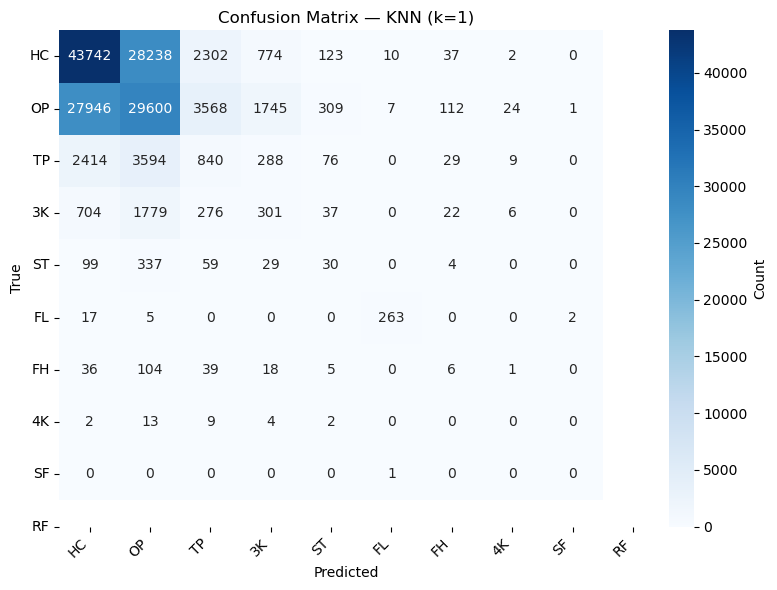

/var/folders/7j/jw6qd6b17ps_wggnnqhg1pnm0000gp/T/ipykernel_41818/656378695.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_for_plot, y=class_f1, palette="viridis")


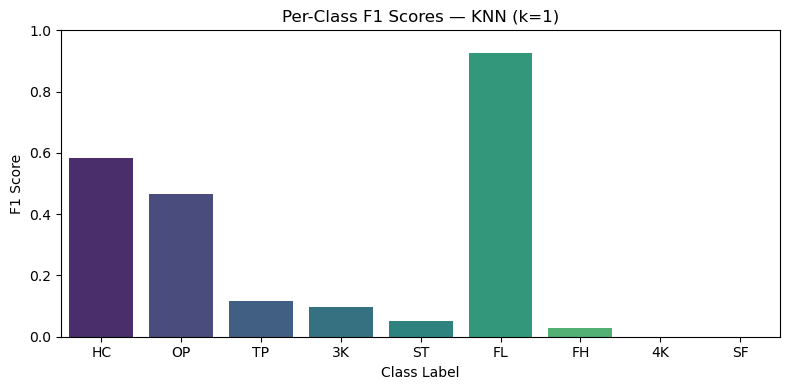

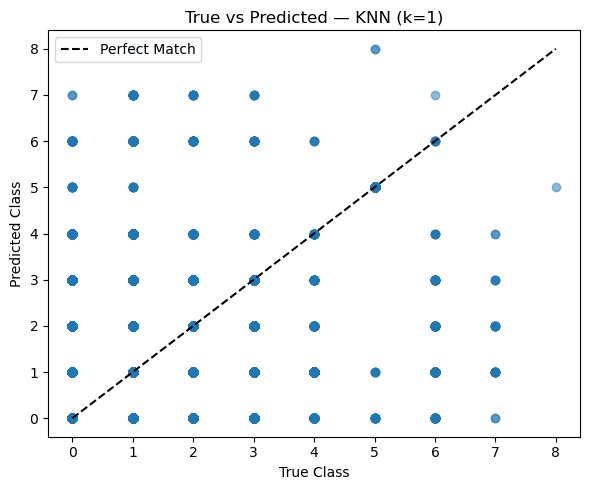

=========> MODEL SUMMARY
Model:         KNN (k=1)
Accuracy:       0.4985
Macro F1 Score:  0.2521
Weighted F1 Score:0.4986
-------------------------------------


Showing results for: Random Forest (n=300)



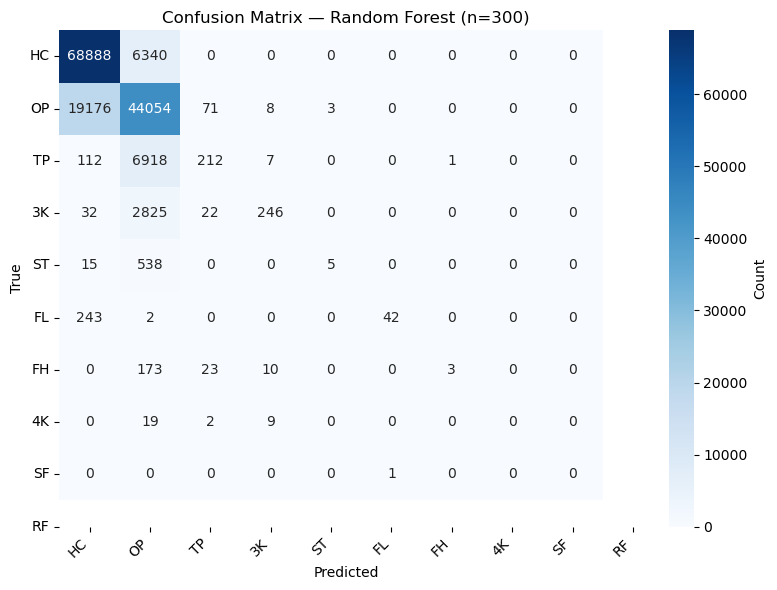

/var/folders/7j/jw6qd6b17ps_wggnnqhg1pnm0000gp/T/ipykernel_41818/656378695.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_for_plot, y=class_f1, palette="viridis")


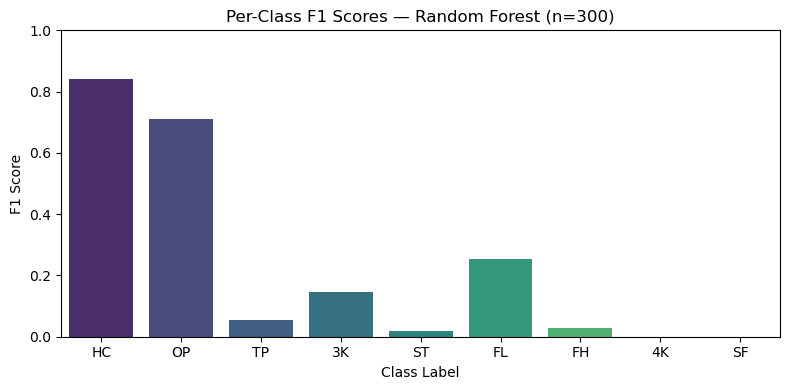

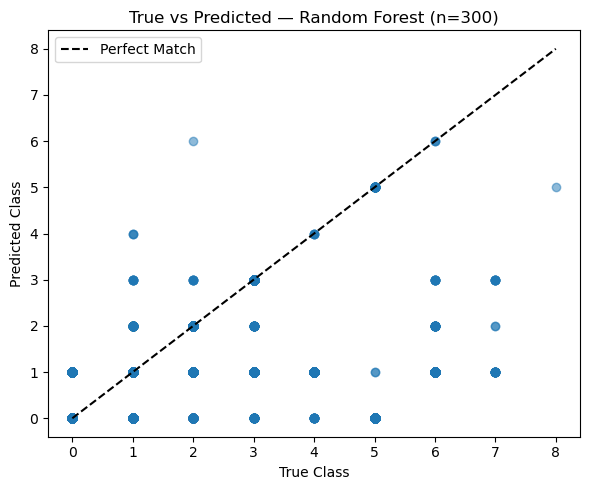

=========> MODEL SUMMARY
Model:         Random Forest (n=300)
Accuracy:       0.7563
Macro F1 Score:  0.2280
Weighted F1 Score:0.7279
-------------------------------------


Showing results for: Gradient Boosting



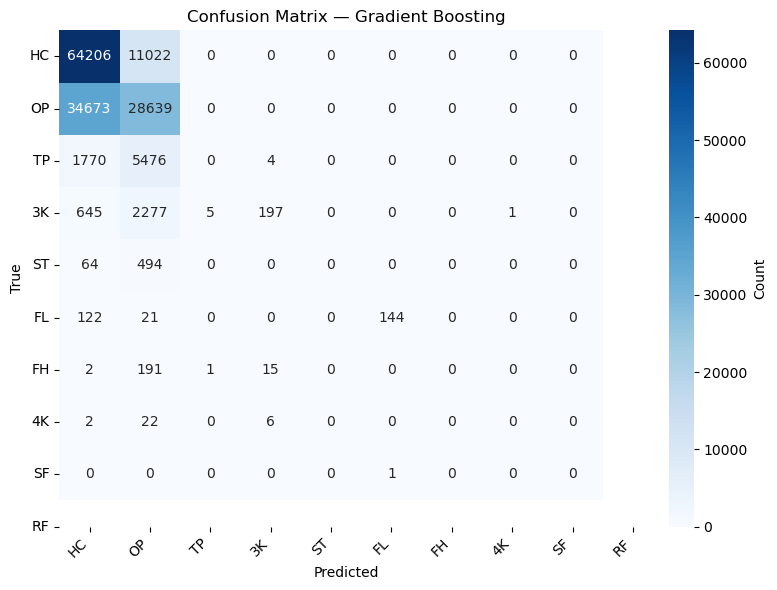

/var/folders/7j/jw6qd6b17ps_wggnnqhg1pnm0000gp/T/ipykernel_41818/656378695.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_for_plot, y=class_f1, palette="viridis")


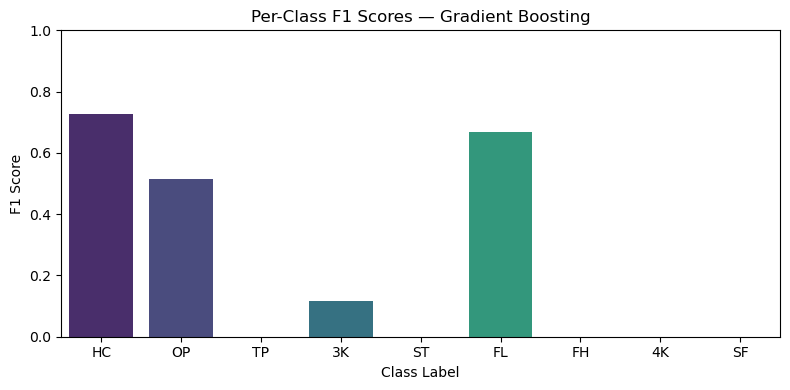

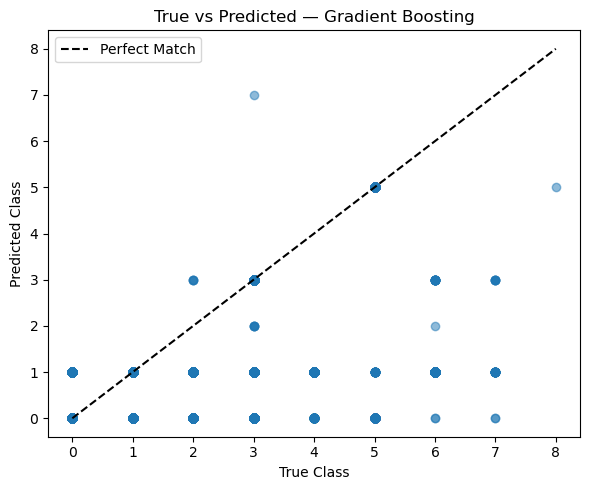

=========> MODEL SUMMARY
Model:         Gradient Boosting
Accuracy:       0.6212
Macro F1 Score:  0.2250
Weighted F1 Score:0.5851
-------------------------------------


Showing results for: XGBoost



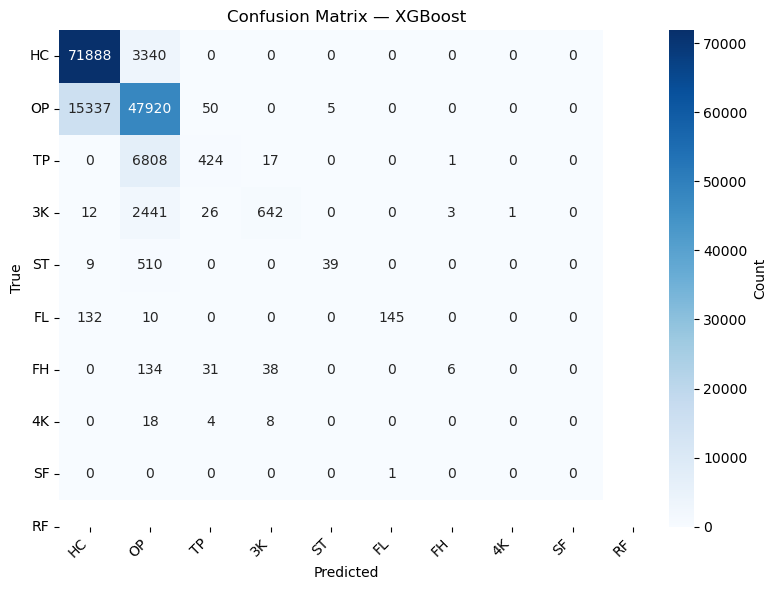

/var/folders/7j/jw6qd6b17ps_wggnnqhg1pnm0000gp/T/ipykernel_41818/656378695.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_for_plot, y=class_f1, palette="viridis")


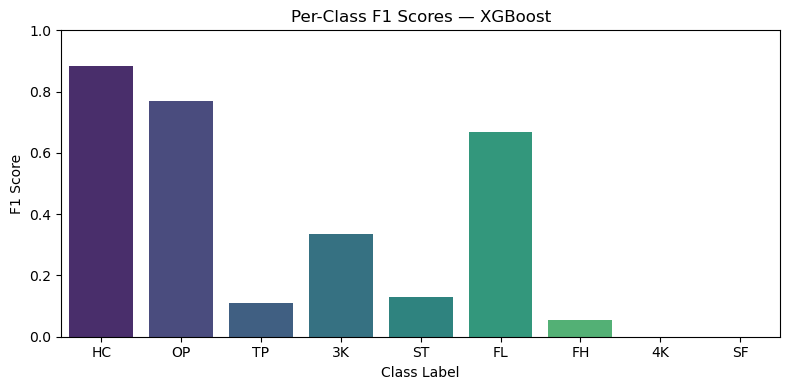

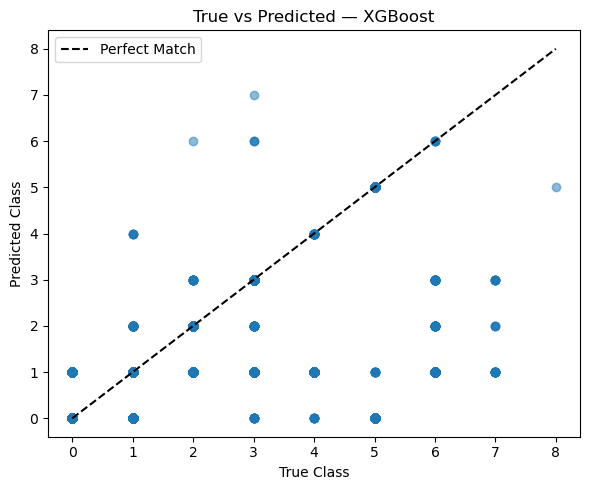

=========> MODEL SUMMARY
Model:         XGBoost
Accuracy:       0.8071
Macro F1 Score:  0.3280
Weighted F1 Score:0.7825
-------------------------------------


Cell 2 complete — all models visualized.



In [16]:
# ============================
# CELL 2 — Visualize ALL Stored Models (Dynamic Classes)
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np

# Short labels (will trim automatically)
poker_labels_short = ["HC","OP","TP","3K","ST","FL","FH","4K","SF","RF"]

# Ensure predictions are stored
if 'stored_preds' not in globals() or len(stored_preds) == 0:
    raise ValueError("No stored predictions found. Run the first cell to evaluate models.")

n_classes = len(np.unique(y_test))  # dynamic class count
labels_for_plot = poker_labels_short[:n_classes]

print(f"\nVisualizing {len(stored_preds)} models ({n_classes} active classes)...\n")

for model_name, y_pred in stored_preds.items():
    print(f"\n============================")
    print(f"Showing results for: {model_name}")
    print(f"============================\n")

    # ----------------------------
    #  Confusion Matrix
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=poker_labels_short,
        yticklabels=poker_labels_short,
        cbar_kws={"label": "Count"}
    )
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # ----------------------------
    # 2 Per-Class F1 Bar Chart
    # ----------------------------
    # --- Per-Class F1 Bar Chart (safe against missing classes)
    class_f1 = f1_score(y_test, y_pred, average=None, labels=np.unique(y_test), zero_division=0)
    labels_for_plot = poker_labels_short[:len(class_f1)]

    plt.figure(figsize=(8,4))
    sns.barplot(x=labels_for_plot, y=class_f1, palette="viridis")
    plt.title(f"Per-Class F1 Scores — {model_name}")
    plt.xlabel("Class Label")
    plt.ylabel("F1 Score")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


    # class_f1 = f1_score(y_test, y_pred, average=None, zero_division=0)
    # plt.figure(figsize=(8,4))
    # sns.barplot(x=np.arange(n_classes), y=class_f1, palette="viridis")
    # plt.title(f"Per-Class F1 Scores — {model_name}")
    # plt.xlabel("Class Label")
    # plt.ylabel("F1 Score")
    # plt.ylim(0, 1)
    # plt.xticks(range(n_classes), labels_for_plot, rotation=0)
    # plt.tight_layout()
    # plt.show()

    # ----------------------------
    # [3]  True vs Predicted Scatter
    # ----------------------------
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0,n_classes-1], [0,n_classes-1], 'k--', label="Perfect Match")
    plt.title(f"True vs Predicted — {model_name}")
    plt.xlabel("True Class")
    plt.ylabel("Predicted Class")
    plt.xticks(range(n_classes))
    plt.yticks(range(n_classes))
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # [4] Summary
    # ----------------------------
    print("=========> MODEL SUMMARY")
    print(f"Model:         {model_name}")
    print(f"Accuracy:       {accuracy_score(y_test, y_pred):.4f}")
    print(f"Macro F1 Score:  {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
    print(f"Weighted F1 Score:{f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print("-------------------------------------\n")

print("\nCell 2 complete — all models visualized.\n")


### To save this result in model_results_balanced.csv

In [17]:
# ============================
# EXPORT MODEL RESULTS (UNBALANCED)
# ============================

import os

os.makedirs("../results", exist_ok=True)

# Force correct filename for 02 (unbalanced)
model_results.to_csv("../results/model_results_unbalanced.csv", index=False)

# Optional: also save classification reports
with open("../results/model_results_unbalanced_reports.txt", "w") as f:
    for name, report in model_reports.items():
        f.write(f"===== {name} =====\n")
        f.write(report)
        f.write("\n\n")

print("\nModel results and reports exported successfully to: ../results/model_results_unbalanced.csv")


Model results and reports exported successfully to: ../results/model_results_unbalanced.csv


In [14]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("Confusion matrix total:", cm.sum())
print("Total data:", len(X))
print("Train:", len(X_train))
print("Val:", len(X_val))
print("Test:", len(X_test))



y_test shape: (3752,)
y_pred shape: (3752,)
Confusion matrix total: 3752
Total data: 25010
Train: 17507
Val: 3751
Test: 3752
